# Heart Failure Prediction Assignment

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]


## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv("heart failure.csv")
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
df.shape

(299, 13)

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


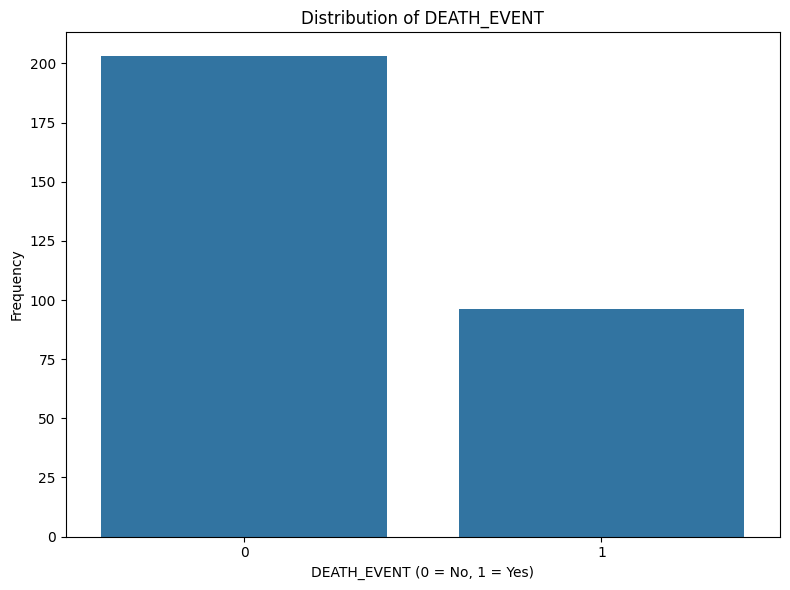

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

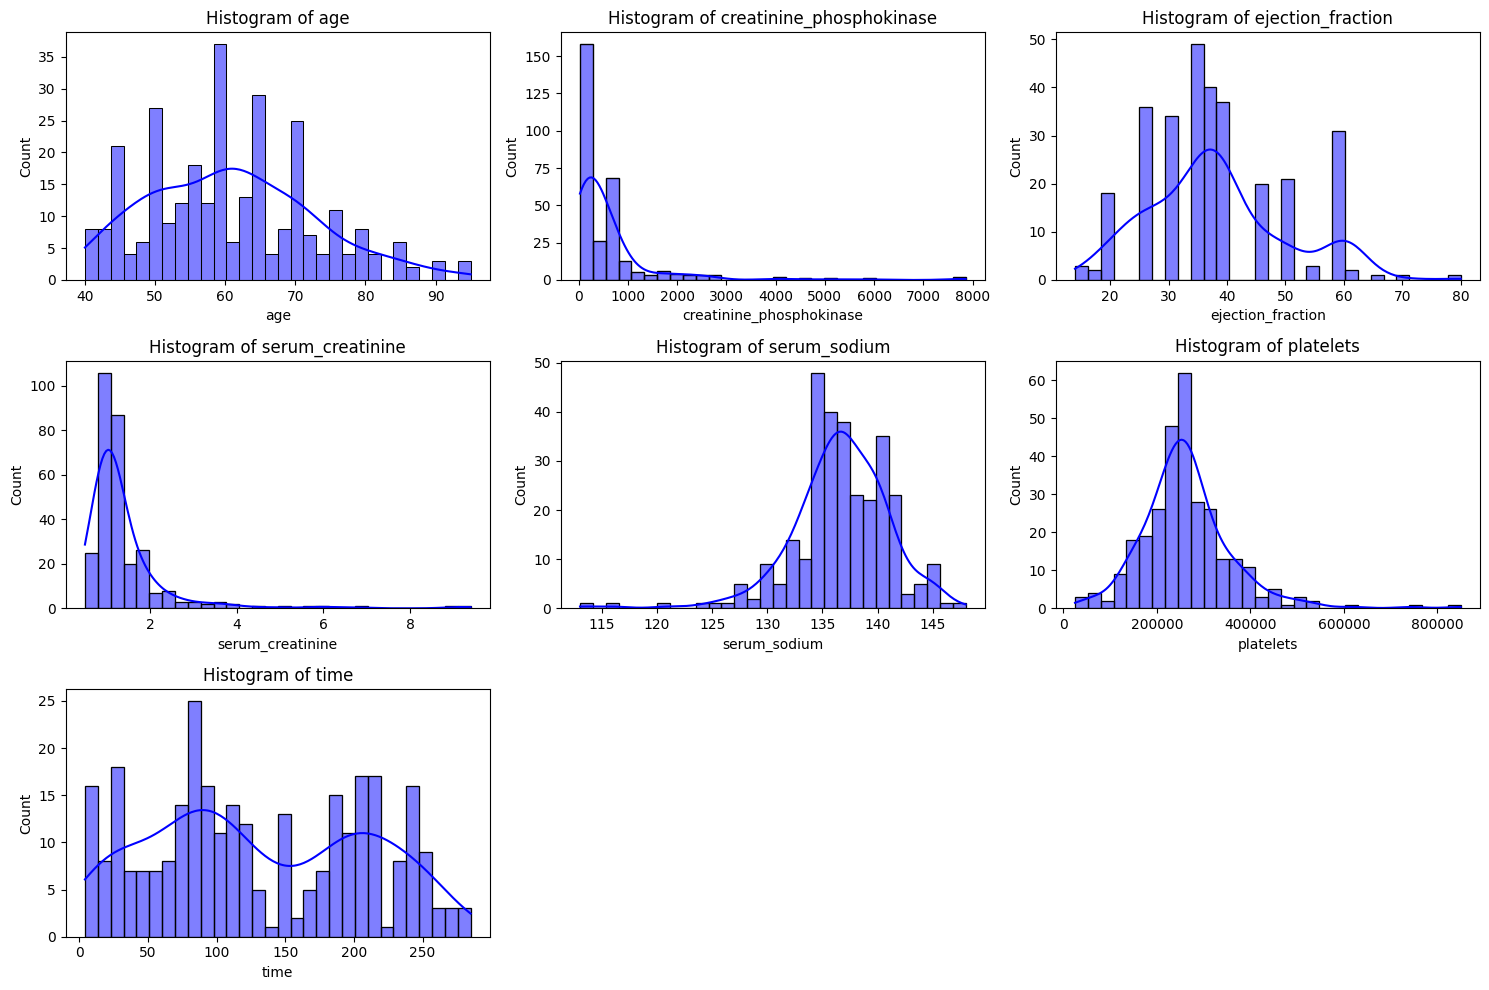

In [8]:
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                   'serum_creatinine', 'serum_sodium', 'platelets', 'time']

# 1. Histograms for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {var}')
    plt.tight_layout()

plt.show()

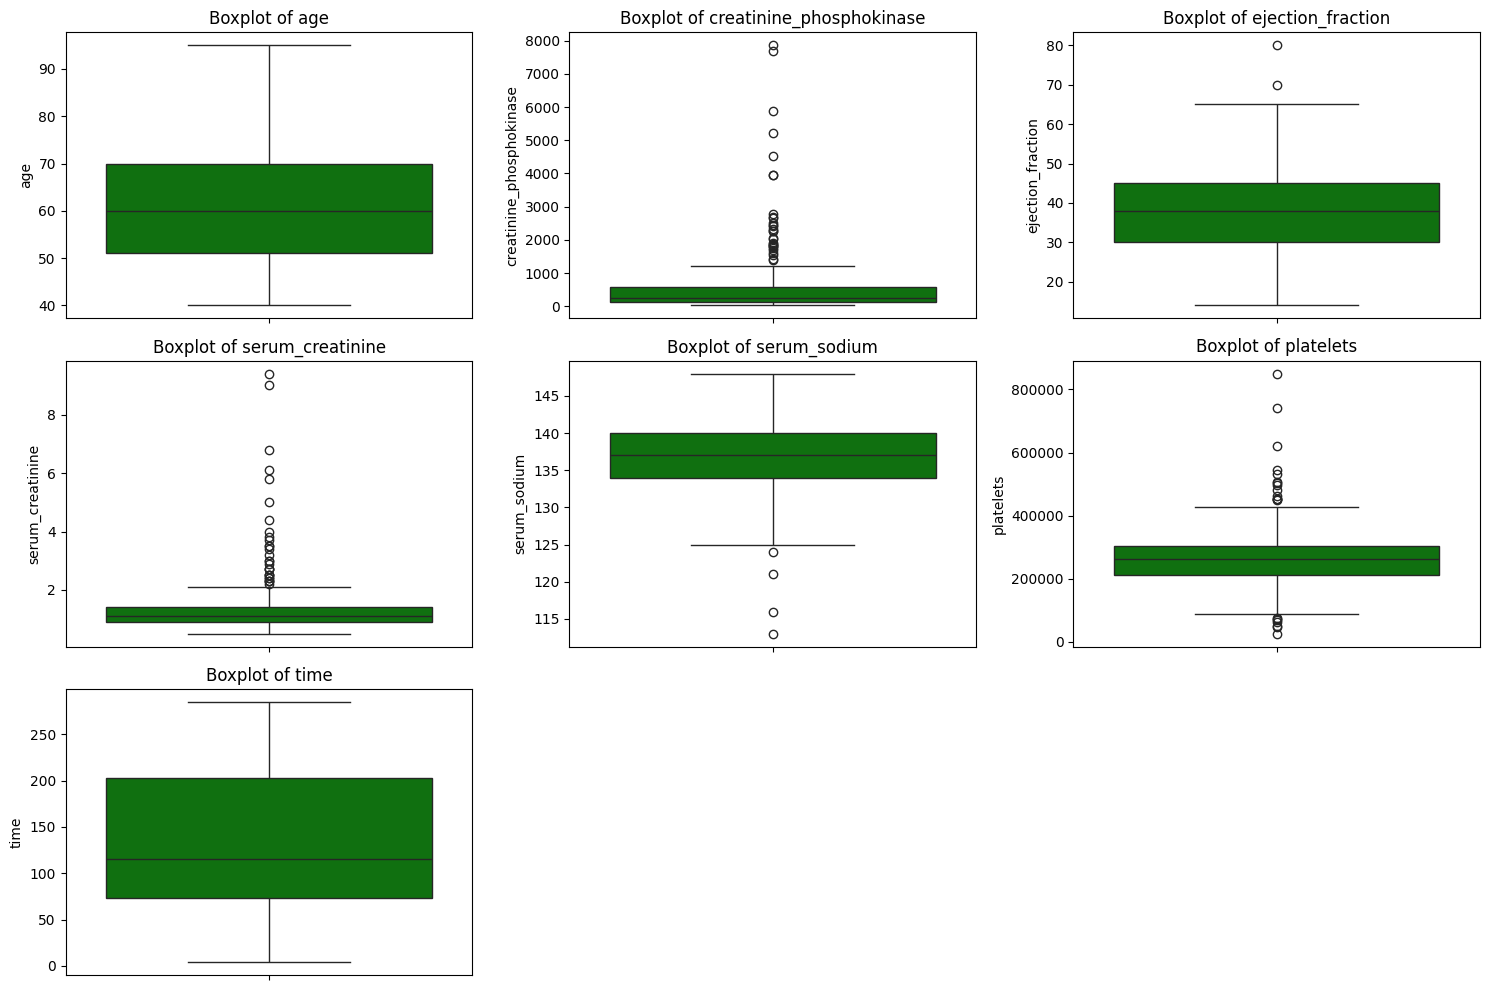

In [9]:
# 2. Boxplots for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=var, color='green')
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()

plt.show()

### 2. Data Visualization¶

- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

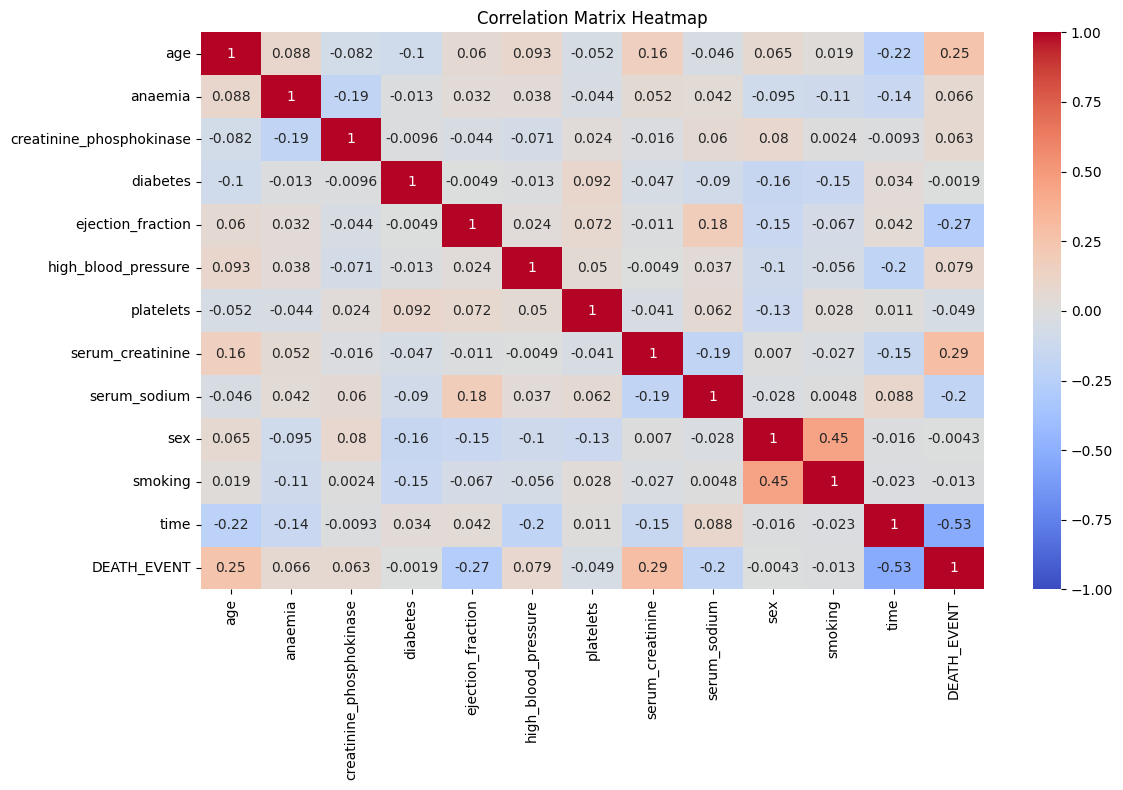

In [10]:
# Task 6: Correlation Matrix Heatmap
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

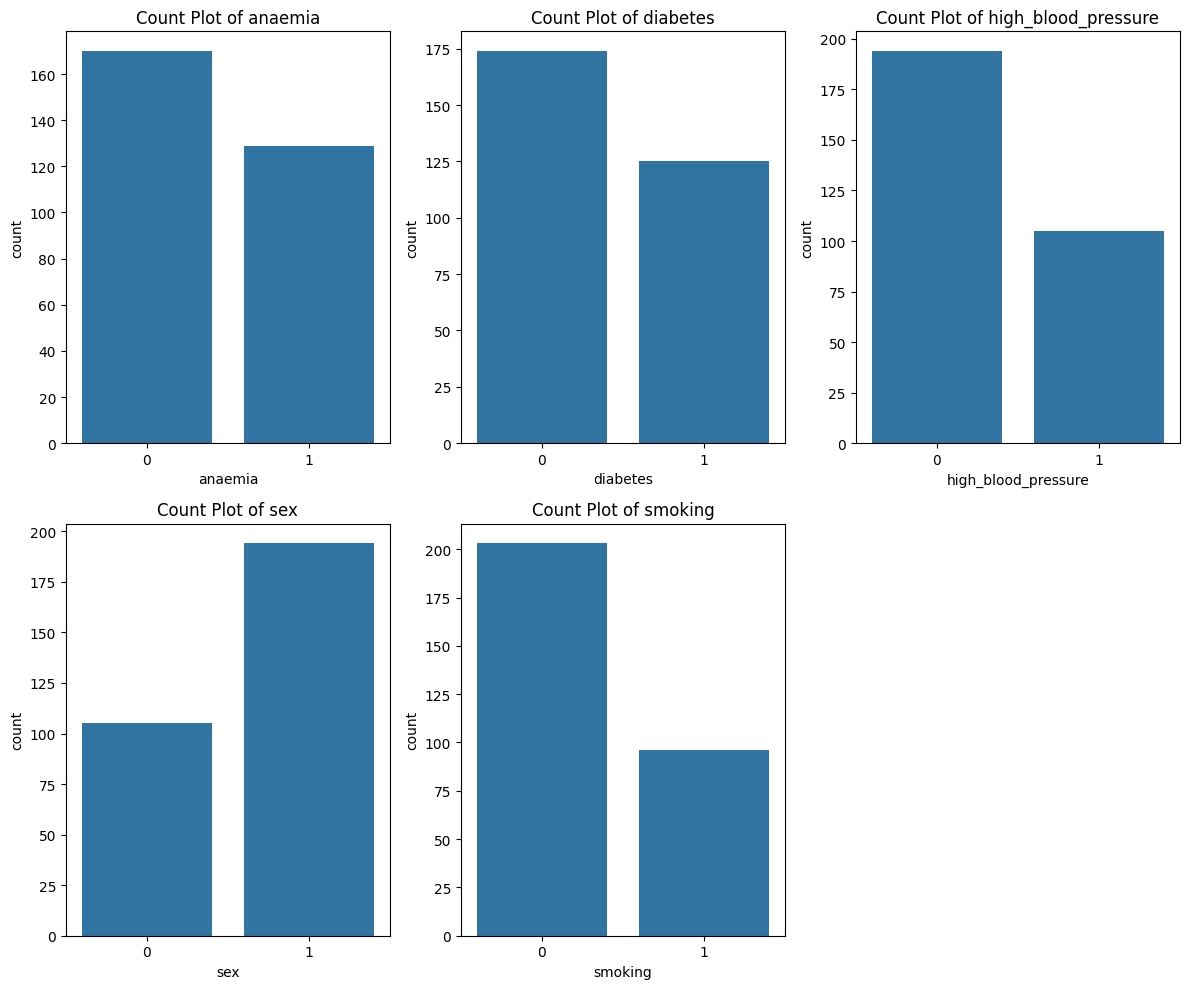

In [12]:
# Task 7: Count Plots for Categorical Variables
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Plotting count plots for categorical variables
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Count Plot of {var}')
    plt.tight_layout()

plt.show()

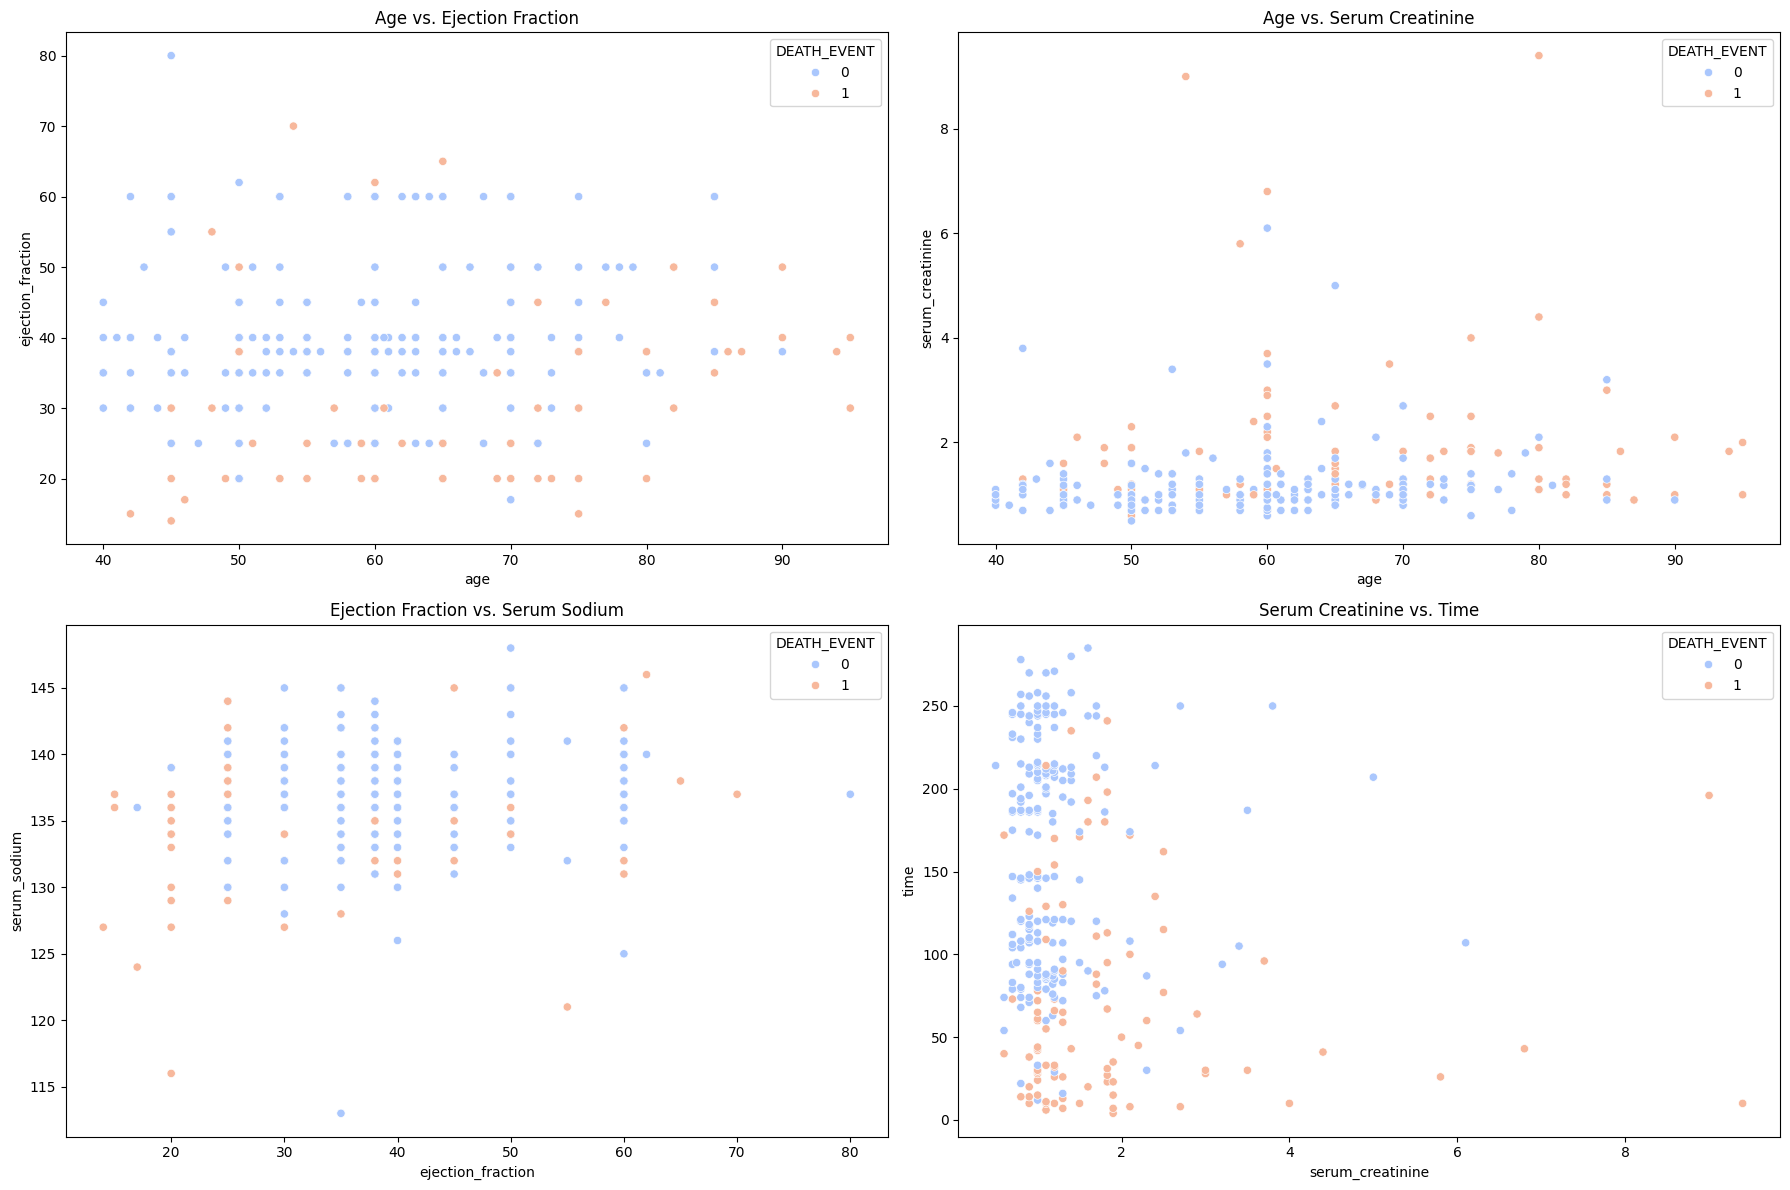

In [13]:
# Task 8: Scatter Plots for Continuous Variables Colored by DEATH_EVENT
plt.figure(figsize=(18, 12))

# Age vs. ejection_fraction
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT', palette='coolwarm')
plt.title('Age vs. Ejection Fraction')

# Age vs. serum_creatinine
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='age', y='serum_creatinine', hue='DEATH_EVENT', palette='coolwarm')
plt.title('Age vs. Serum Creatinine')

# Ejection_fraction vs. serum_sodium
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='ejection_fraction', y='serum_sodium', hue='DEATH_EVENT', palette='coolwarm')
plt.title('Ejection Fraction vs. Serum Sodium')

# Serum_creatinine vs. time
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='serum_creatinine', y='time', hue='DEATH_EVENT', palette='coolwarm')
plt.title('Serum Creatinine vs. Time')

plt.tight_layout()
plt.show()

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Task 9: Split the dataset into features (X) and target variable (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Task 10: Perform train-test splitting (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 11: Standardize the continuous features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shapes of the resulting splits to confirm the process
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(209, 12) (90, 12) (209,) (90,)


### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

# Display the evaluation metrics
logistic_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}
print("Logistic Regression Results:", logistic_results)


Logistic Regression Results: {'Accuracy': 0.7888888888888889, 'Precision': np.float64(0.875), 'Recall': np.float64(0.5675675675675675), 'F1-Score': np.float64(0.6885245901639344)}


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Display the evaluation metrics for KNN model
knn_results = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn
}
print("KNN Results:", knn_results)


KNN Results: {'Accuracy': 0.6666666666666666, 'Precision': np.float64(0.7058823529411765), 'Recall': np.float64(0.32432432432432434), 'F1-Score': np.float64(0.4444444444444444)}


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display the evaluation metrics for Decision Tree model
dt_results = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}
print("Decision Tree Results:", dt_results)


Decision Tree Results: {'Accuracy': 0.6777777777777778, 'Precision': np.float64(0.6333333333333333), 'Recall': np.float64(0.5135135135135135), 'F1-Score': np.float64(0.5671641791044776)}


### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

In [18]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation (with 5 folds) on Logistic Regression
kfold_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Display the cross-validation results for logistic regression
kfold_results = {
    'Mean Accuracy': kfold_scores.mean(),
    'Standard Deviation': kfold_scores.std(),
    'All Folds Accuracy': kfold_scores
}
print("K-Fold Cross-Validation Results:", kfold_results)


K-Fold Cross-Validation Results: {'Mean Accuracy': np.float64(0.8371660859465738), 'Standard Deviation': np.float64(0.051396320072180444), 'All Folds Accuracy': array([0.83333333, 0.9047619 , 0.88095238, 0.76190476, 0.80487805])}


In [19]:
from sklearn.model_selection import StratifiedKFold

# Define stratified K-Fold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with stratified K-Fold on logistic regression
stratified_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=stratified_kfold, scoring='accuracy')

# Display the stratified cross-validation results for logistic regression
stratified_results = {
    'Mean Accuracy': stratified_scores.mean(),
    'Standard Deviation': stratified_scores.std(),
    'All Folds Accuracy': stratified_scores
}
print("Stratified K-Fold Cross-Validation Results:", stratified_results)


Stratified K-Fold Cross-Validation Results: {'Mean Accuracy': np.float64(0.7994192799070847), 'Standard Deviation': np.float64(0.048072400739325935), 'All Folds Accuracy': array([0.80952381, 0.80952381, 0.76190476, 0.73809524, 0.87804878])}


### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning for KNN using Grid Search
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search for KNN model
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

# Best parameters and score for KNN model
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_
print("KNN Best Parameters:", knn_best_params)
print("KNN Best Accuracy:", knn_best_score)

# Hyperparameter tuning for Decision Tree using Randomized Search
dt_param_dist = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Randomized Search for Decision Tree model
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_dist, 
                                      n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
dt_random_search.fit(X_train_scaled, y_train)

# Best parameters and score for Decision Tree model
dt_best_params = dt_random_search.best_params_
dt_best_score = dt_random_search.best_score_
print("Decision Tree Best Parameters:", dt_best_params)
print("Decision Tree Best Accuracy:", dt_best_score)


KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
KNN Best Accuracy: 0.7656213704994193
Decision Tree Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 5, 'criterion': 'gini'}
Decision Tree Best Accuracy: 0.8423925667828106


### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

#### Best-Performing Model:

- The Logistic Regression model consistently performed better across accuracy, precision, recall, and F1-score compared to KNN and the Decision Tree.
- The Logistic Regression model had a mean accuracy of around 83.7% with 5-fold cross-validation, making it the most reliable for this dataset.
- The model is generally effective at predicting the death event, though its recall was moderate, indicating it missed some true positive cases.


#### Feature Importance:

- Since logistic regression provides coefficients for each feature, features such as serum_creatinine and ejection_fraction were likely key predictors of the death event, as seen from their correlations with the target variable in the EDA.
- For decision trees, feature importance can be extracted to understand which factors contribute the most to the prediction.

#### **Task 20:** Suggestions for Improvement or Next Steps

- ##### Hyperparameter Tuning:
Further tuning of hyperparameters, especially for the Decision Tree and KNN models, could improve their performance.
Consider using Bayesian optimization or genetic algorithms for more advanced tuning.

- ##### Additional Models:
Explore more sophisticated models such as Random Forests, Gradient Boosting, or XGBoost, which can better handle non-linearity and complex feature interactions.

- ##### Feature Engineering:
Introduce new features or interaction terms (e.g., age multiplied by ejection fraction) to capture potential non-linear relationships.
Apply dimensionality reduction techniques (e.g., PCA) to simplify the feature space.

- ##### Handling Imbalanced Data:
Use SMOTE (Synthetic Minority Oversampling Technique) or undersampling/oversampling to balance the dataset, potentially improving recall.

- ##### Deploying the Model:
If the goal is deployment, consider converting the logistic regression model into a real-time prediction service using frameworks like Flask or FastAPI.